[課題のURL](https://diver.diveintocode.jp/curriculums/1868)

# Sprintアンサンブル学習

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import scipy
import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

%matplotlib inline

# 小さなデータセットの用意

In [2]:
df = pd.read_csv('train.csv', index_col=0)

In [3]:
# GrLivAreaとYearBuiltを抜き出す。
X = df[["GrLivArea", "YearBuilt"]]
y = df["SalePrice"]

In [4]:
df = pd.concat([X, y], axis=1)
df.head(3)

,GrLivArea,YearBuilt,SalePrice
Id,,,
1,1710,2003,208500
2,1262,1976,181500
3,1786,2001,223500


In [5]:
print("missing_ration")
na_columns = (df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending=False)) / 1460
na_columns

missing_ration


Series([], dtype: float64)

In [6]:
# 対数変換
df["SalePrice"] = np.log(df["SalePrice"])
df["GrLivArea"] = np.log(df["GrLivArea"])
df["YearBuilt"] = np.log(df["YearBuilt"])

# 外れ値の除去
df.drop(df[(df["GrLivArea"]>4500) & (df['SalePrice']<300000)].index, inplace=True)
df.reset_index(drop=True, inplace=True)

X = df[["GrLivArea", "YearBuilt"]]
#X = df[["GrLivArea"]]
y = df["SalePrice"]
df = pd.concat([X, y], axis=1)

df.head(2)

,GrLivArea,YearBuilt,SalePrice
0,7.444249,7.602401,12.247694
1,7.140453,7.588830,12.109011


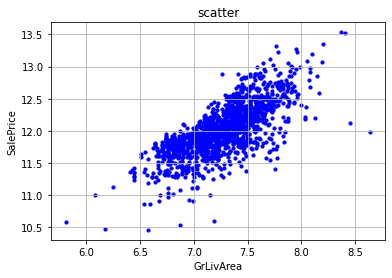

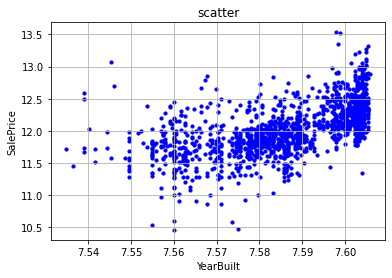

In [7]:
# グラフの描画
plt.title("scatter") # (5)タイトル
plt.xlabel("GrLivArea") # (6)x軸ラベル
plt.ylabel("SalePrice") # (7)y軸ラベル

plt.scatter(df[["GrLivArea"]], df["SalePrice"], s=10, c = 'blue')
plt.grid() # グリッド線を表示
plt.show()

plt.title("scatter") # (5)タイトル
plt.xlabel("YearBuilt") # (6)x軸ラベル
plt.ylabel("SalePrice") # (7)y軸ラベル

plt.scatter(df[["YearBuilt"]], df["SalePrice"], s=10, c = 'blue')
plt.grid() # グリッド線を表示
plt.show()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 【問題1】ブレンディングのスクラッチ実装

ブレンディング をスクラッチ実装し、単一モデルより精度があがる例を 最低3つ 示してください。  
精度があがるとは、検証用データに対する平均二乗誤差（MSE）が小さくなることを指します。  

モデル単体  
・線形回帰 0.04590550537802955  
・SVR 0.04395091582650826  
・決定木 0.07245932849558485  
・ランダムフォレスト 0.04063562350007295  

* 参考:モデル単体

1. 決定木(0.5)+SVR(0.5) 0.044379297297467146  
→決定木、SVR単体と比べ精度が向上  

2. 決定木(0.3)+SVR(0.4)+線系回帰(0.3) 0.041218949244985495  
→決定木, SVR, 線形回帰単体と比べ精度が向上  

3. 決定木(0.25)+SVR(0.25)+線系回帰(0.25)+ランダムフォレスト(0.25) 0.04007051443922988  
→決定木, SVR, 線形回帰単体, ランダムフォレストと比べ精度が向上 

* 参考:単体モデル

In [9]:
from sklearn.linear_model import LinearRegression

lr_init = LinearRegression()
lr_init.fit(X_train, y_train)

y_pred = lr_init.predict(X_test)

score_lr_init = mean_squared_error(y_test, y_pred)

print("平均二乗誤差（標準偏差、ばらつき、MSE）", score_lr_init)


平均二乗誤差（標準偏差、ばらつき、MSE） 0.04590550537802955


In [10]:
from sklearn.svm import SVR

svr_init = SVR()
svr_init.fit(X_train, y_train)

y_pred = svr_init.predict(X_test)

score_svr_init = mean_squared_error(y_test, y_pred)

print("平均二乗誤差（標準偏差、ばらつき、MSE）", score_svr_init)

平均二乗誤差（標準偏差、ばらつき、MSE） 0.04395091582650826


In [11]:
from sklearn.tree import DecisionTreeRegressor

dt_init = DecisionTreeRegressor()
dt_init.fit(X_train, y_train)

y_pred = dt_init.predict(X_test)

score_dt_init = mean_squared_error(y_test, y_pred)

print("平均二乗誤差（標準偏差、ばらつき、MSE）", score_dt_init)

平均二乗誤差（標準偏差、ばらつき、MSE） 0.07433195314483924


In [12]:
from sklearn.ensemble import RandomForestRegressor

df_init = RandomForestRegressor()
df_init.fit(X_train, y_train)

y_pred = df_init.predict(X_test)

score_df_init = mean_squared_error(y_test, y_pred)

print("平均二乗誤差（標準偏差、ばらつき、MSE）", score_df_init)

平均二乗誤差（標準偏差、ばらつき、MSE） 0.042598247965260544


* ブレンディング01(決定木 + SVR)

In [13]:
def blend_models_predict_01(X):
    return ((0.5 * dt_init.predict(X)) + \
            (0.5 * svr_init.predict((X))))

In [14]:
y_pred = blend_models_predict_01(X_test)

score_blend_01 = mean_squared_error(y_test, y_pred)
print("平均二乗誤差（標準偏差、ばらつき、MSE）", score_blend_01)

平均二乗誤差（標準偏差、ばらつき、MSE） 0.045636116320075956


* ブレンディング02(決定木 + SVR + 線形回帰)

In [15]:
def blend_models_predict_02(X):
    return ((0.3 * dt_init.predict(X)) + \
            (0.3 * lr_init.predict(X)) + \
            (0.4 * svr_init.predict((X))))

In [16]:
y_pred = blend_models_predict_02(X_test)

score_blend_02 = mean_squared_error(y_test, y_pred)
print("平均二乗誤差（標準偏差、ばらつき、MSE）", score_blend_02)

平均二乗誤差（標準偏差、ばらつき、MSE） 0.04195428460412758


* ブレンディング03(決定木 + SVR + 線形回帰 + ランダムフォレスト)

In [17]:
def blend_models_predict_03(X):
    return ((0.25 * dt_init.predict(X)) + \
            (0.25 * lr_init.predict(X)) + \
            (0.25 * df_init.predict(X)) + \
            (0.25 * svr_init.predict((X))))

In [18]:
y_pred = blend_models_predict_03(X_test)

score_blend_03 = mean_squared_error(y_test, y_pred)
print("平均二乗誤差（標準偏差、ばらつき、MSE）", score_blend_03)

平均二乗誤差（標準偏差、ばらつき、MSE） 0.04103567429799736


# 【問題2】バギングのスクラッチ実装

バギング をスクラッチ実装し、単一モデルより精度があがる例を 最低1つ 示してください。  

モデル単体  
・決定木 0.07245932849558485  

バギング  
・決定木 0.05908729877882455  

参考 sklearn  
・決定木 0.045146755942696716  

* 参考:sklearn

In [165]:
from sklearn.ensemble import BaggingRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True,random_state=0)

dt_init_bagging = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=10, verbose=3, random_state=0)
dt_init_bagging.fit(X_train, y_train)

y_pred = dt_init_bagging.predict(X_test)

score_dt_init_bagging = mean_squared_error(y_test, y_pred)
print("平均二乗誤差（標準偏差、ばらつき、MSE）", score_dt_init_bagging)

Building estimator 1 of 10 for this parallel run (total 10)...
Building estimator 2 of 10 for this parallel run (total 10)...
Building estimator 3 of 10 for this parallel run (total 10)...
Building estimator 4 of 10 for this parallel run (total 10)...
Building estimator 5 of 10 for this parallel run (total 10)...
Building estimator 6 of 10 for this parallel run (total 10)...
Building estimator 7 of 10 for this parallel run (total 10)...
Building estimator 8 of 10 for this parallel run (total 10)...
Building estimator 9 of 10 for this parallel run (total 10)...
Building estimator 10 of 10 for this parallel run (total 10)...
平均二乗誤差（標準偏差、ばらつき、MSE） 0.045146755942696716


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [166]:
dt_init_bagging.estimators_

[DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2087557356, splitter='best'),
 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=132990059, splitter='best'),
 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_dec

* スクラッチ

In [183]:
def scratch_bagging(X, y, model, n_estimators=10):
    
    clf = [i for i in range(n_estimators)]
    
    # BaggingRegressorの初期値(n_estimators=10)
    for i in range(n_estimators):
        
        clf[i] = model()
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
        
        clf[i].fit(X_train, y_train)

        y_pred = clf[i].predict(X_test)
        
        score = mean_squared_error(y_test, y_pred)
        print("平均二乗誤差（標準偏差、ばらつき、MSE）", score)
    
    return clf

def scratch_bagging_predict(clf, X_test, y_test):
    
    n_estimators = len(clf)
    
    for i in range(n_estimators):
        
        if i == 0:
            y_pred_sum = clf[i].predict(X_test)
        else:
            y_pred = clf[i].predict(X_test)
            y_pred_sum = 0.5*y_pred + 0.5*y_pred_sum
    
    score = mean_squared_error(y_test, y_pred_sum)
    print("bagging 平均二乗誤差（標準偏差、ばらつき、MSE）", score)
    
    return

In [186]:
clf = scratch_bagging(X_train, y_train, DecisionTreeRegressor, n_estimators=10)
scratch_bagging_predict(clf, X_test, y_test)

平均二乗誤差（標準偏差、ばらつき、MSE） 0.05617614630712429
平均二乗誤差（標準偏差、ばらつき、MSE） 0.08146840841379732
平均二乗誤差（標準偏差、ばらつき、MSE） 0.06440809803212749
平均二乗誤差（標準偏差、ばらつき、MSE） 0.054070483335672
平均二乗誤差（標準偏差、ばらつき、MSE） 0.07086546741260655
平均二乗誤差（標準偏差、ばらつき、MSE） 0.06910077305222734
平均二乗誤差（標準偏差、ばらつき、MSE） 0.07143657741810569
平均二乗誤差（標準偏差、ばらつき、MSE） 0.0877238201106474
平均二乗誤差（標準偏差、ばらつき、MSE） 0.07718322357276418
平均二乗誤差（標準偏差、ばらつき、MSE） 0.06898673442591895
bagging 平均二乗誤差（標準偏差、ばらつき、MSE） 0.05908729877882455


# 【問題3】スタッキングのスクラッチ実装

スタッキング をスクラッチ実装し、単一モデルより精度があがる例を 最低1つ 示してください。

線形回帰モデル単体  
0.04590550537802955  

決定木とSVRを利用し、最終的に線形回帰を利用したモデル    
0.04008880857911466  

参考 sklearn  
0.0419192785251291  


* 参考:sklearn

In [170]:
from sklearn.ensemble import StackingRegressor

estimators = [
    ('dt', DecisionTreeRegressor()),
    ('svr', SVR())
]

reg = StackingRegressor(
    estimators=estimators,
    final_estimator=LinearRegression(),
    cv=3
)

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
score_stack = mean_squared_error(y_test, y_pred)

print("平均二乗誤差（標準偏差、ばらつき、MSE）", score_stack)

平均二乗誤差（標準偏差、ばらつき、MSE） 0.0419192785251291


* スクラッチ

In [172]:
# K=3, M=2
# ステージ0
# データを分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 学習データを3個に分割
X_train_k, X_k0, y_train_k, y_k0 = train_test_split(X_train, y_train, test_size=0.333, random_state=0)

# 2/3のデータを1/2する
X_k1, X_k2, y_k1, y_k2 = train_test_split(X_train_k, y_train_k, test_size=0.5, random_state=1)

print(X_train.shape, y_train.shape)
print(X_k0.shape, X_k1.shape, X_k2.shape)
print(y_k0.shape, y_k1.shape, y_k2.shape)

(1168, 2) (1168,)
(389, 2) (389, 2) (390, 2)
(389,) (389,) (390,)


In [173]:
# あるモデルのインスタンスを3個用意し、異なる学習用データを使い学習する。
# それぞれの学習済みモデルに対して、使っていない残り 1個の推定用データを入力し、
# 推定値を得る。（これをブレンドデータと呼ぶ）
k = 3

# データの用意
X_k0_k1 = np.concatenate([X_k0, X_k1], 0)
y_k0_k1 = np.concatenate([y_k0, y_k1], 0)

X_k0_k2 = np.concatenate([X_k0, X_k2], 0)
y_k0_k2 = np.concatenate([y_k0, y_k2], 0)

X_k1_k2 = np.concatenate([X_k1, X_k2], 0)
y_k1_k2 = np.concatenate([y_k1, y_k2], 0)

# M0
lr_0 = DecisionTreeRegressor()
lr_1 = DecisionTreeRegressor()
lr_2 = DecisionTreeRegressor()
print("モデル1")

# 学習データ K0+K1, 推定用データ K2
lr_0.fit(X_k0_k1, y_k0_k1)

y_pred_lr0 = lr_0.predict(X_k2)
score_lr0 = mean_squared_error(y_k2, y_pred_lr0)
print("平均二乗誤差（標準偏差、ばらつき、MSE）", score_lr0)

# 学習データ K0+K2, 推定用データ K1
lr_1.fit(X_k0_k2, y_k0_k2)

y_pred_lr1 = lr_1.predict(X_k1)
score_lr1 = mean_squared_error(y_k1, y_pred_lr1)
print("平均二乗誤差（標準偏差、ばらつき、MSE）", score_lr1)

# 学習データ K1+K2, 推定用データ K0
lr_2.fit(X_k1_k2, y_k1_k2)

y_pred_lr2 = lr_2.predict(X_k0)
score_lr2 = mean_squared_error(y_k0, y_pred_lr2)
print("平均二乗誤差（標準偏差、ばらつき、MSE）", score_lr2)


モデル1
平均二乗誤差（標準偏差、ばらつき、MSE） 0.08654267590867973
平均二乗誤差（標準偏差、ばらつき、MSE） 0.06195637493964244
平均二乗誤差（標準偏差、ばらつき、MSE） 0.07983589091049167


In [174]:
# さらに、異なるモデルのインスタンスも 3個用意し、同様のことを行う。
# モデルが 2個あれば、 2個のブレンドデータが得られる。

# M1
sr_0 = SVR()
sr_1 = SVR()
sr_2 = SVR()
print("モデル2")

# 学習データ K0+K1, 推定用データ K2
sr_0.fit(X_k0_k1, y_k0_k1)

y_pred_sr0 = sr_0.predict(X_k2)
score_sr0 = mean_squared_error(y_k2, y_pred_sr0)
print("平均二乗誤差（標準偏差、ばらつき、MSE）", score_sr0)

# 学習データ K0+K2, 推定用データ K1
sr_1.fit(X_k0_k2, y_k0_k2)

y_pred_sr1 = sr_1.predict(X_k1)
score_sr1 = mean_squared_error(y_k1, y_pred_sr1)
print("平均二乗誤差（標準偏差、ばらつき、MSE）", score_sr1)

# 学習データ K1+K2, 推定用データ K0
sr_2.fit(X_k1_k2, y_k1_k2)

y_pred_sr2 = sr_2.predict(X_k0)
score_sr2 = mean_squared_error(y_k0, y_pred_sr2)
print("平均二乗誤差（標準偏差、ばらつき、MSE）", score_sr2)


モデル2
平均二乗誤差（標準偏差、ばらつき、MSE） 0.05958120014864558
平均二乗誤差（標準偏差、ばらつき、MSE） 0.047931509395830844
平均二乗誤差（標準偏差、ばらつき、MSE） 0.0470748156587504


In [175]:
# ブレンドデータの結合
# 
blend_data0 = np.concatenate([y_pred_lr2, y_pred_lr1, y_pred_lr0], 0)
blend_data1 = np.concatenate([y_pred_sr2, y_pred_sr1, y_pred_sr0], 0)

blend_data = np.concatenate([blend_data0.reshape(blend_data0.shape[0],1), blend_data1.reshape(blend_data0.shape[0],1)], 1)


In [176]:
# ステージn 最終ステージ
# 1種類のモデルの学習を行う。これが最終的な推定を行うモデルとなる。

# train_test_splitでランダムに分割されているため、y_trainは利用できない。
y_k0_k1_k2 = np.concatenate([y_k0, y_k1, y_k2], 0)

meta_model = LinearRegression()
meta_model.fit(blend_data, y_k0_k1_k2)
#meta_model.fit(stacked_predictions, y_k0)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [177]:
# 推定時
# ステージ0
# テストデータを 3×2個の学習済みモデルに入力し、
# 3×2個の推定値を得る。

blend_test_lr0 = lr_0.predict(X_test)
blend_test_lr1 = lr_1.predict(X_test)
blend_test_lr2 = lr_2.predict(X_test)

blend_test_sr0 = sr_0.predict(X_test)
blend_test_sr1 = sr_1.predict(X_test)
blend_test_sr2 = sr_2.predict(X_test)

# @@@暫定
blend_test_lr = lr.predict(X_test)
brend_test_sr = sr.predict(X_test)

# これを K0の軸で平均値を求め M0次元の特徴量を持つデータを得る。
# （ブレンドテストと呼ぶ）
temp0 = (blend_test_lr0 + blend_test_lr1 + blend_test_lr2)/3
temp1 = (blend_test_sr0 + blend_test_sr1 + blend_test_sr2)/3

# @@@暫定
#temp0 = blend_test_lr
#temp1 = brend_test_sr

blend_test = np.concatenate([temp0.reshape(temp0.shape[0],1), temp1.reshape(temp1.shape[0],1)], 1)

In [178]:
metal_predict = meta_model.predict(blend_test)

score_blend = mean_squared_error(y_test, metal_predict)
print("平均二乗誤差（標準偏差、ばらつき、MSE）", score_blend)

平均二乗誤差（標準偏差、ばらつき、MSE） 0.04008880857911466
